# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [68]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import last_week_main

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

def PolyCoefficients_cubical(x, coeffs, x_value, y_value):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = y_value
    for i in range(o):
        y += coeffs[i]*(x-x_value)**(i+1)
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


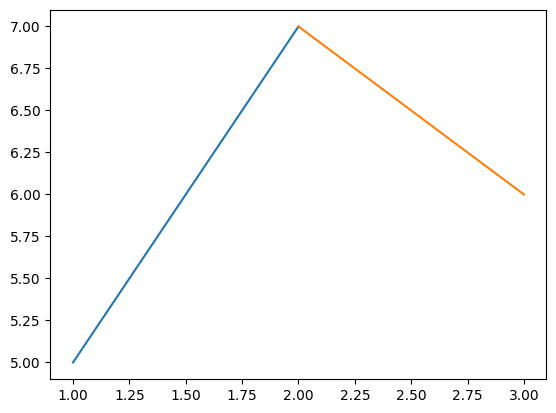

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


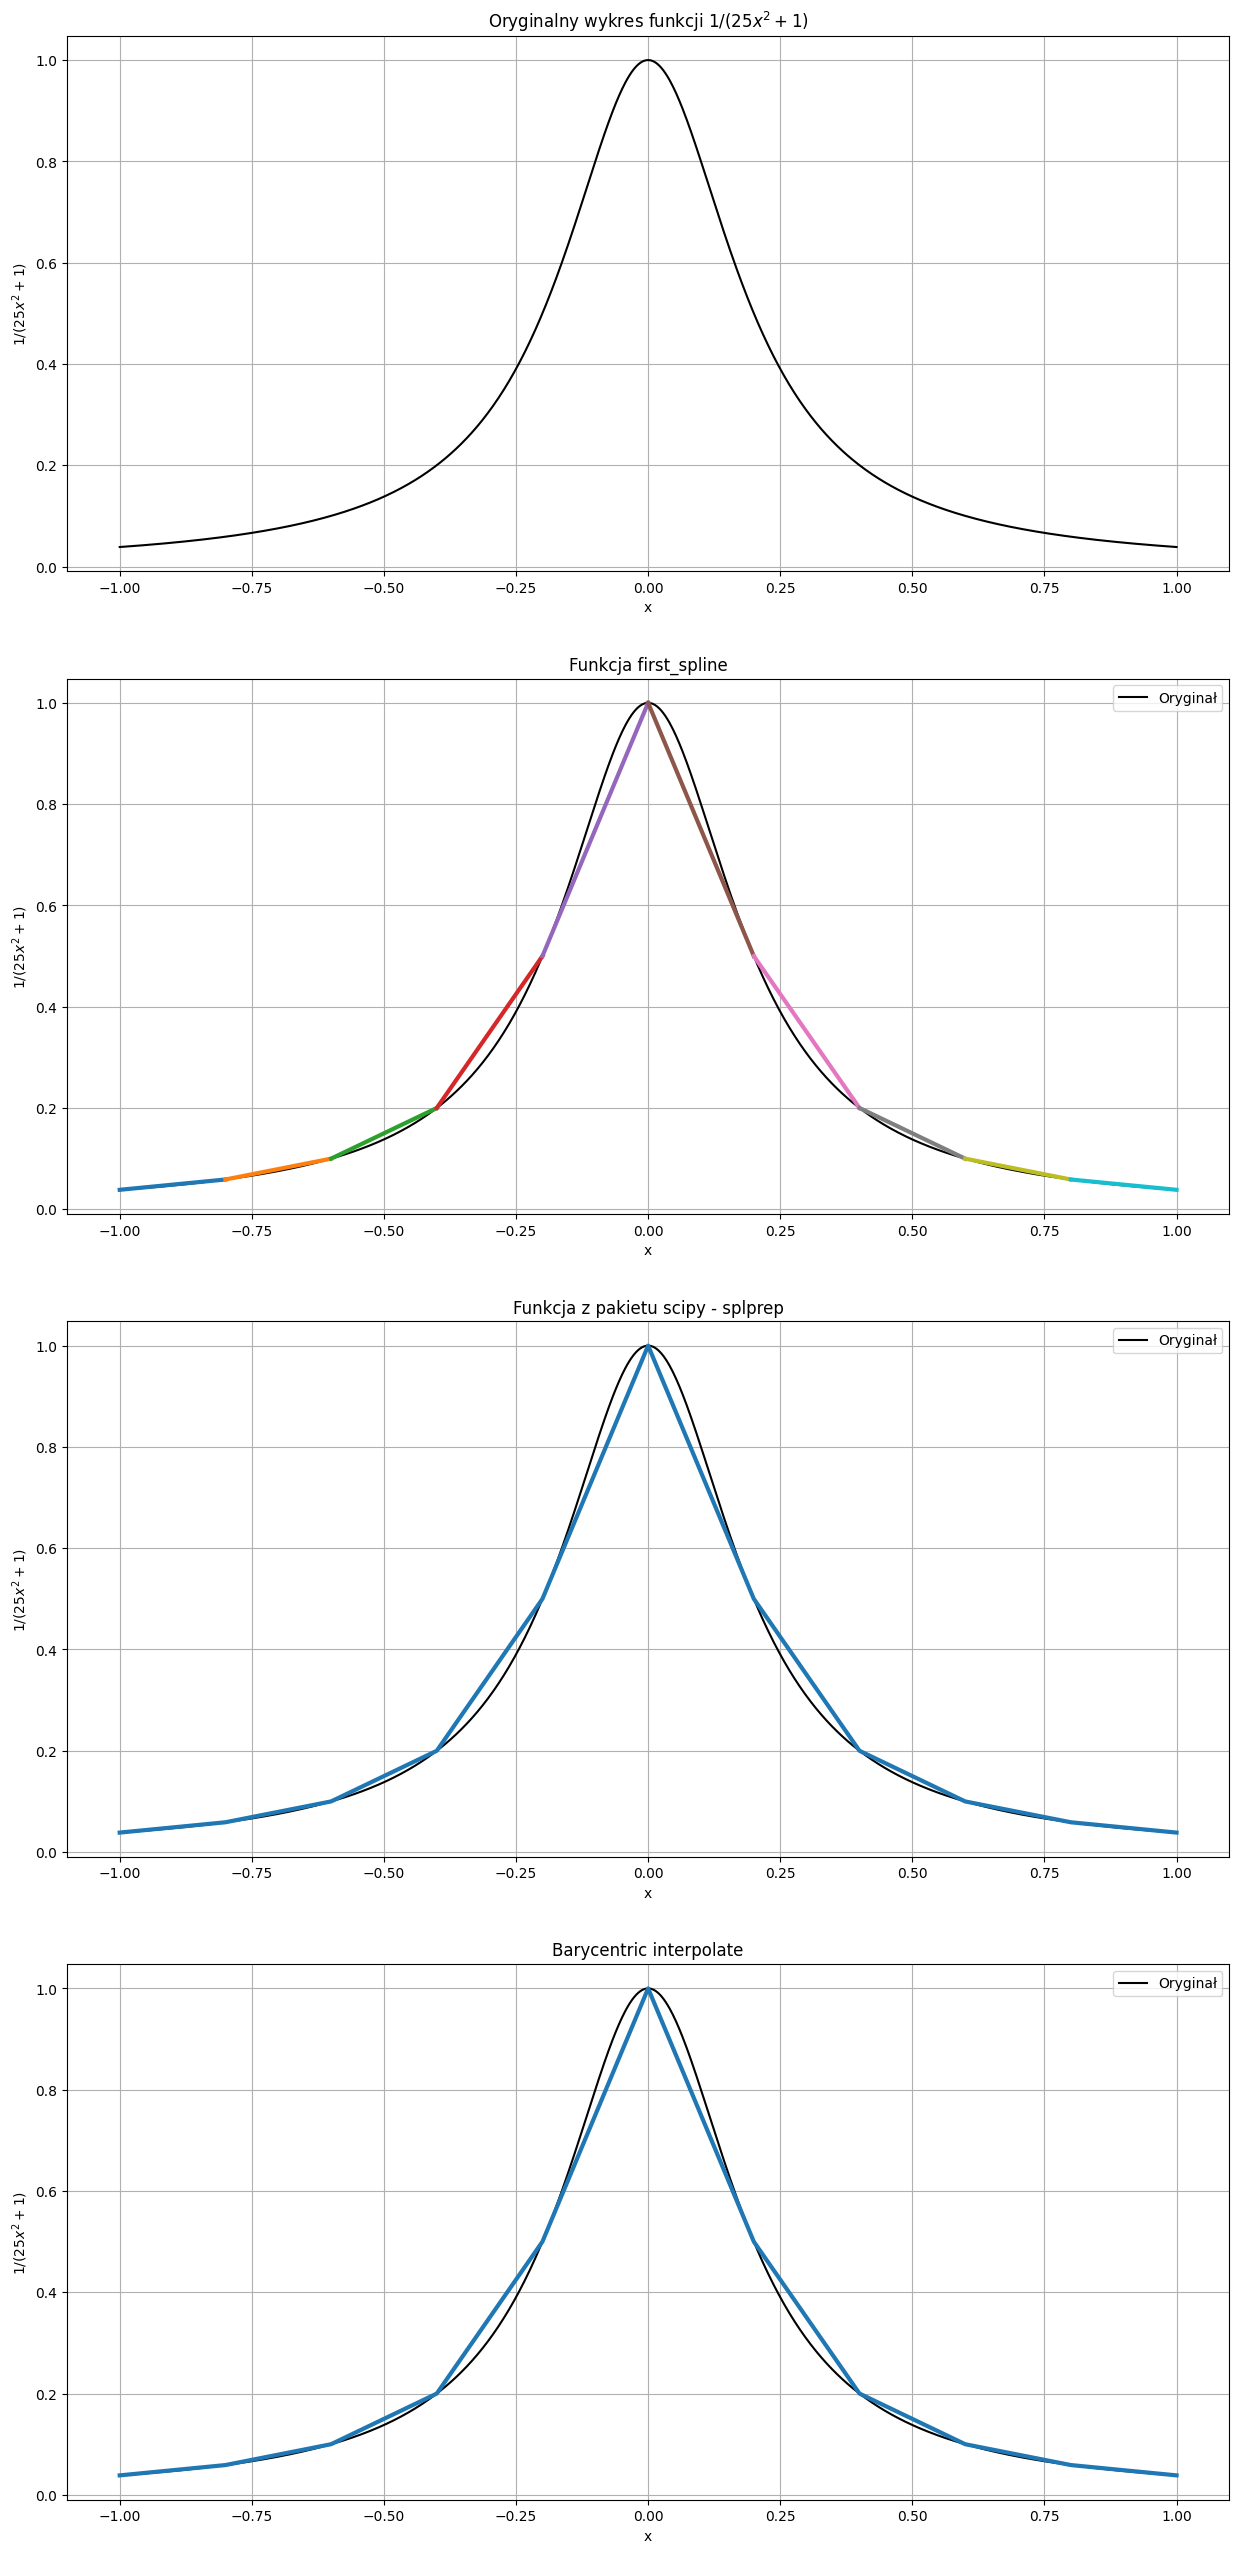

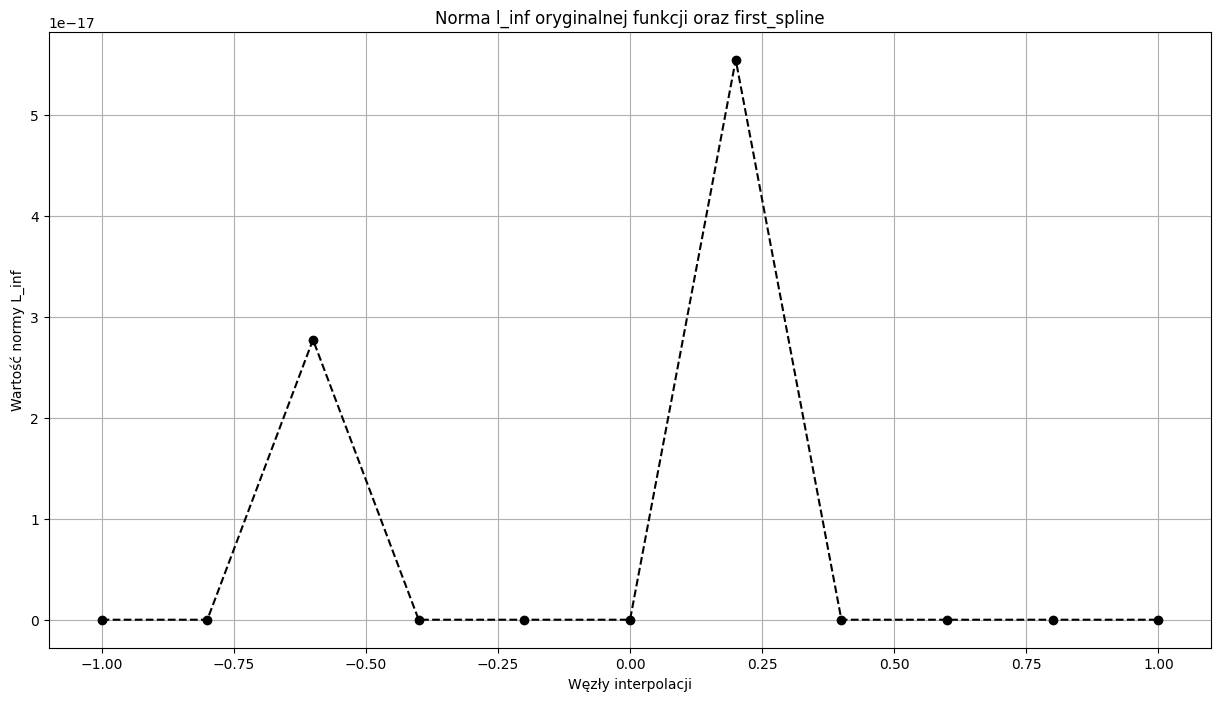

In [70]:
f = lambda x: 1/(25*x**2+1)

nodes = np.linspace(-1, 1, 11)

domain = np.linspace(-1, 1, 1000)

tck, u = scipy.interpolate.splprep([nodes, f(nodes)], s=0)
x1, y1 = scipy.interpolate.splev(u, tck)

a2, b2 = main.first_spline(nodes, f(nodes))
f2 = [[b2[i],a2[i]] for i in range(len(a2))]

yinp = scipy.interpolate.barycentric_interpolate(nodes, f(nodes), nodes)

plt.figure(figsize=(15, 32))

ax = plt.subplot(4, 1, 1)
ax.plot(domain, f(domain), 'k')
ax.set(xlabel='x', ylabel='$1/(25x^2+1)$')
plt.grid()
plt.title(label='Oryginalny wykres funkcji $1/(25x^2+1)$')

values = []
x = nodes

ax = plt.subplot(4, 1, 2)
ax.plot(domain, f(domain), 'k', label='Oryginał')
for i in range(len(nodes)-1):
    x_new = np.linspace(nodes[i], nodes[i+1], 1000)
    values.append((PolyCoefficients(x_new, f2[i]))[0])
    ax.plot(x_new, PolyCoefficients(x_new, f2[i]), linewidth=3)
x_new = np.linspace(nodes[-2], nodes[-1], 1000)
values.append((PolyCoefficients(x_new, f2[-1]))[-1])
ax.set(xlabel='x', ylabel='$1/(25x^2+1)$')
plt.grid()
plt.legend()
plt.title(label='Funkcja first_spline')

ax = plt.subplot(4, 1, 3)
ax.plot(domain, f(domain), 'k', label='Oryginał')
ax.plot(x1, y1, linewidth=3)
ax.set(xlabel='x', ylabel='$1/(25x^2+1)$')
plt.grid()
plt.legend()
plt.title(label='Funkcja z pakietu scipy - splprep')

ax = plt.subplot(4, 1, 4)
ax.plot(domain, f(domain), 'k', label='Oryginał')
ax.plot(nodes, yinp, linewidth=3)
ax.set(xlabel='x', ylabel='$1/(25x^2+1)$')
plt.title(label='Barycentric interpolate')
plt.grid()
plt.legend()
plt.show()

errors = []
for i in range(len(values)):
    errors.append(last_week_main.L_inf((f(nodes))[i], values[i]))

plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.plot(nodes, errors, 'ko--')
ax.set(xlabel='Węzły interpolacji', ylabel='Wartość normy L_inf')
plt.grid()
plt.title(label='Norma l_inf oryginalnej funkcji oraz first_spline')
plt.show()


***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


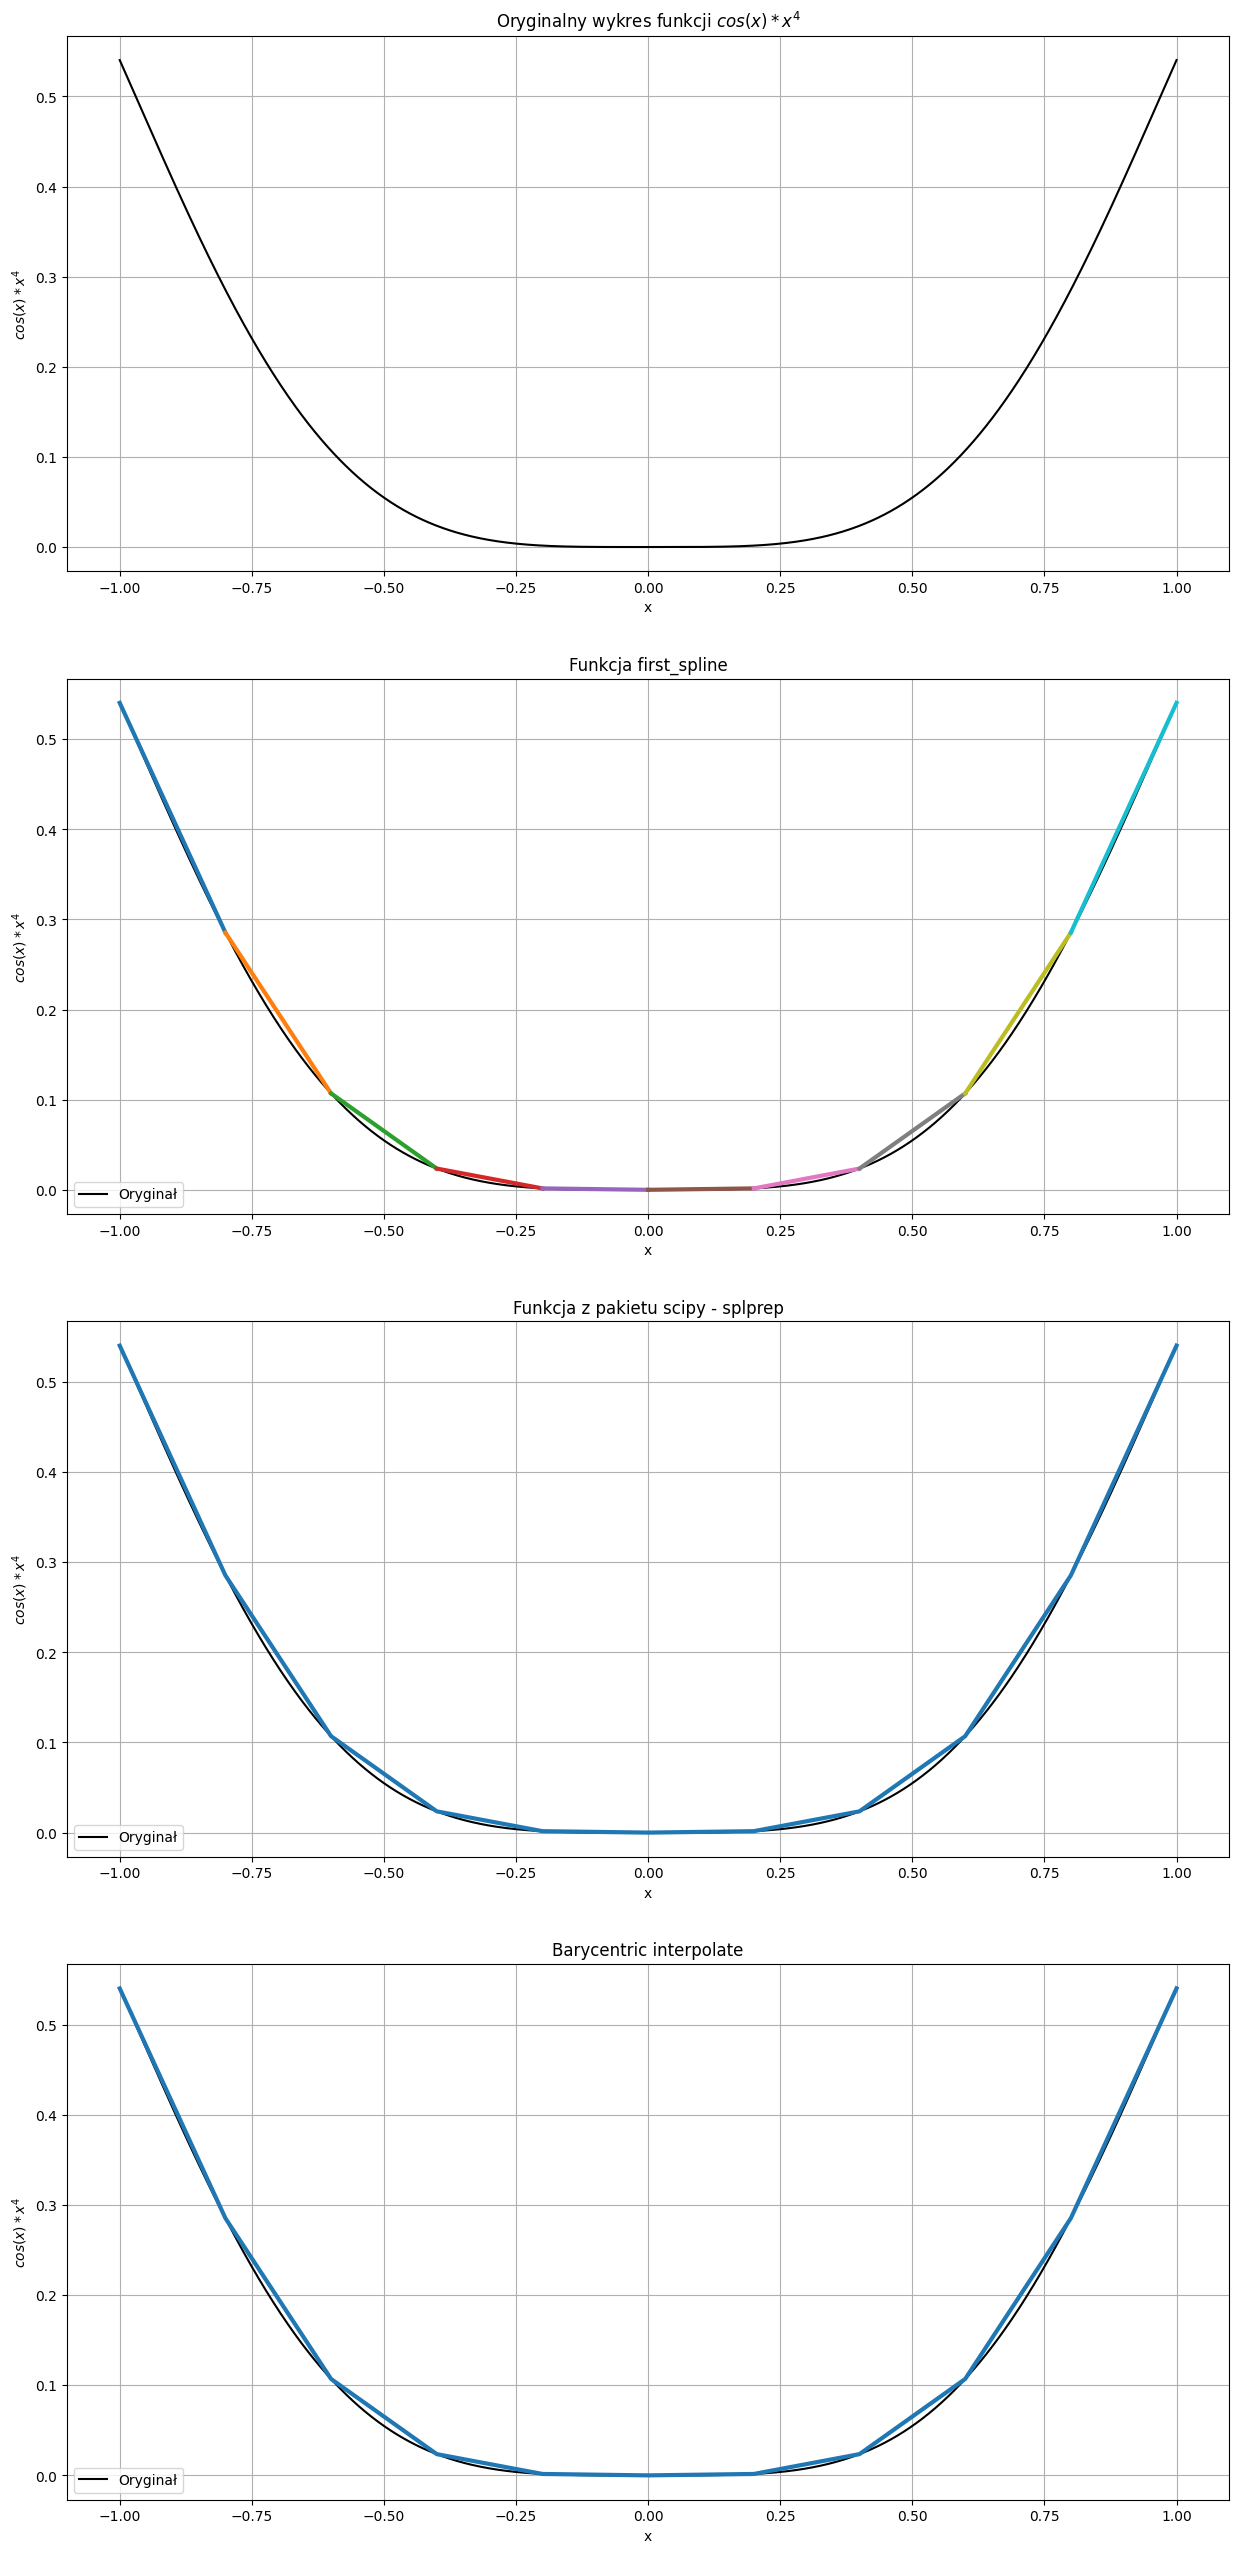

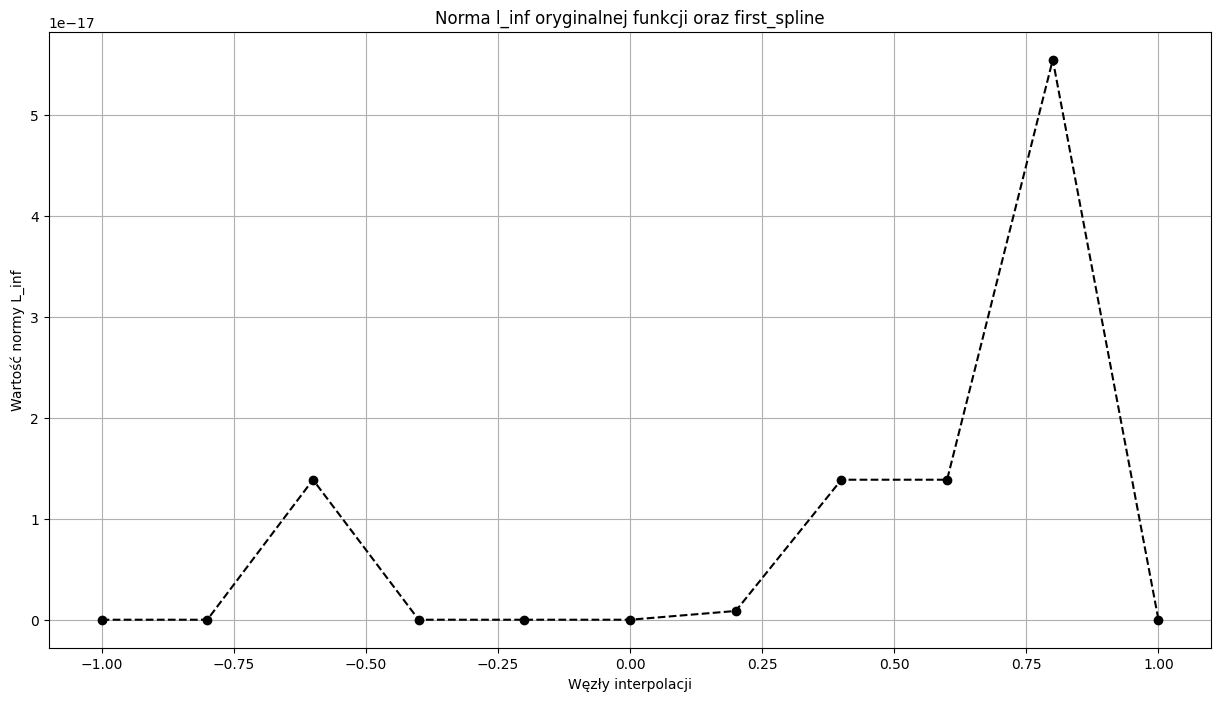

In [71]:
f = lambda x: np.cos(x)*x**4

nodes = np.linspace(-1, 1, 11)

domain = np.linspace(-1, 1, 1000)

tck, u = scipy.interpolate.splprep([nodes, f(nodes)], s=0)
x, y = scipy.interpolate.splev(u, tck)

a, b = main.first_spline(nodes, f(nodes))
f2 = [[b[i],a[i]] for i in range(len(a2))]

yinp = scipy.interpolate.barycentric_interpolate(nodes, f(nodes), nodes)

plt.figure(figsize=(15, 32))

ax = plt.subplot(4, 1, 1)
ax.plot(domain, f(domain), 'k')
ax.set(xlabel='x', ylabel='$cos(x)*x^4$')
plt.grid()
plt.title(label='Oryginalny wykres funkcji $cos(x)*x^4$')

values = []
x = np.linspace(-1, 1, 11)
ax = plt.subplot(4, 1, 2)
ax.plot(domain, f(domain), 'k', label='Oryginał')
for i in range(len(nodes)-1):
    x_new = np.linspace(nodes[i], nodes[i+1], 1000)
    values.append((PolyCoefficients(x_new, f2[i]))[0])
    ax.plot(x_new, PolyCoefficients(x_new, f2[i]), linewidth=3)
x_new = np.linspace(nodes[-2], nodes[-1], 1000)
values.append((PolyCoefficients(x_new, f2[-1]))[-1])
ax.set(xlabel='x', ylabel='$cos(x)*x^4$')
plt.grid()
plt.legend()
plt.title(label='Funkcja first_spline')

ax = plt.subplot(4, 1, 3)
ax.plot(domain, f(domain), 'k', label='Oryginał')
ax.plot(x, y, linewidth=3)
ax.set(xlabel='x', ylabel='$cos(x)*x^4$')
plt.grid()
plt.legend()
plt.title(label='Funkcja z pakietu scipy - splprep')

ax = plt.subplot(4, 1, 4)
ax.plot(domain, f(domain), 'k', label='Oryginał')
ax.plot(nodes, yinp, linewidth=3)
ax.set(xlabel='x', ylabel='$cos(x)*x^4$')
plt.title(label='Barycentric interpolate')
plt.grid()
plt.legend()
plt.show()

errors = []
for i in range(len(values)):
    errors.append(last_week_main.L_inf((f(nodes))[i], values[i]))

plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.plot(nodes, errors, 'ko--')
ax.set(xlabel='Węzły interpolacji', ylabel='Wartość normy L_inf')
plt.grid()
plt.title(label='Norma l_inf oryginalnej funkcji oraz first_spline')
plt.show()

Analizując powyższe wykresy dotyczące zarówno funkcji $1/(25x^2+1)$ a także $cos(x)*x^4$ można zauważyć, że przybliżenie funkcji splajnem już pierwszego stopnia daje nam bardzo dobre przybliżenie funkcji oraz gwarantuje dobrą jakość interpolacji.

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Jacobi Method Output:


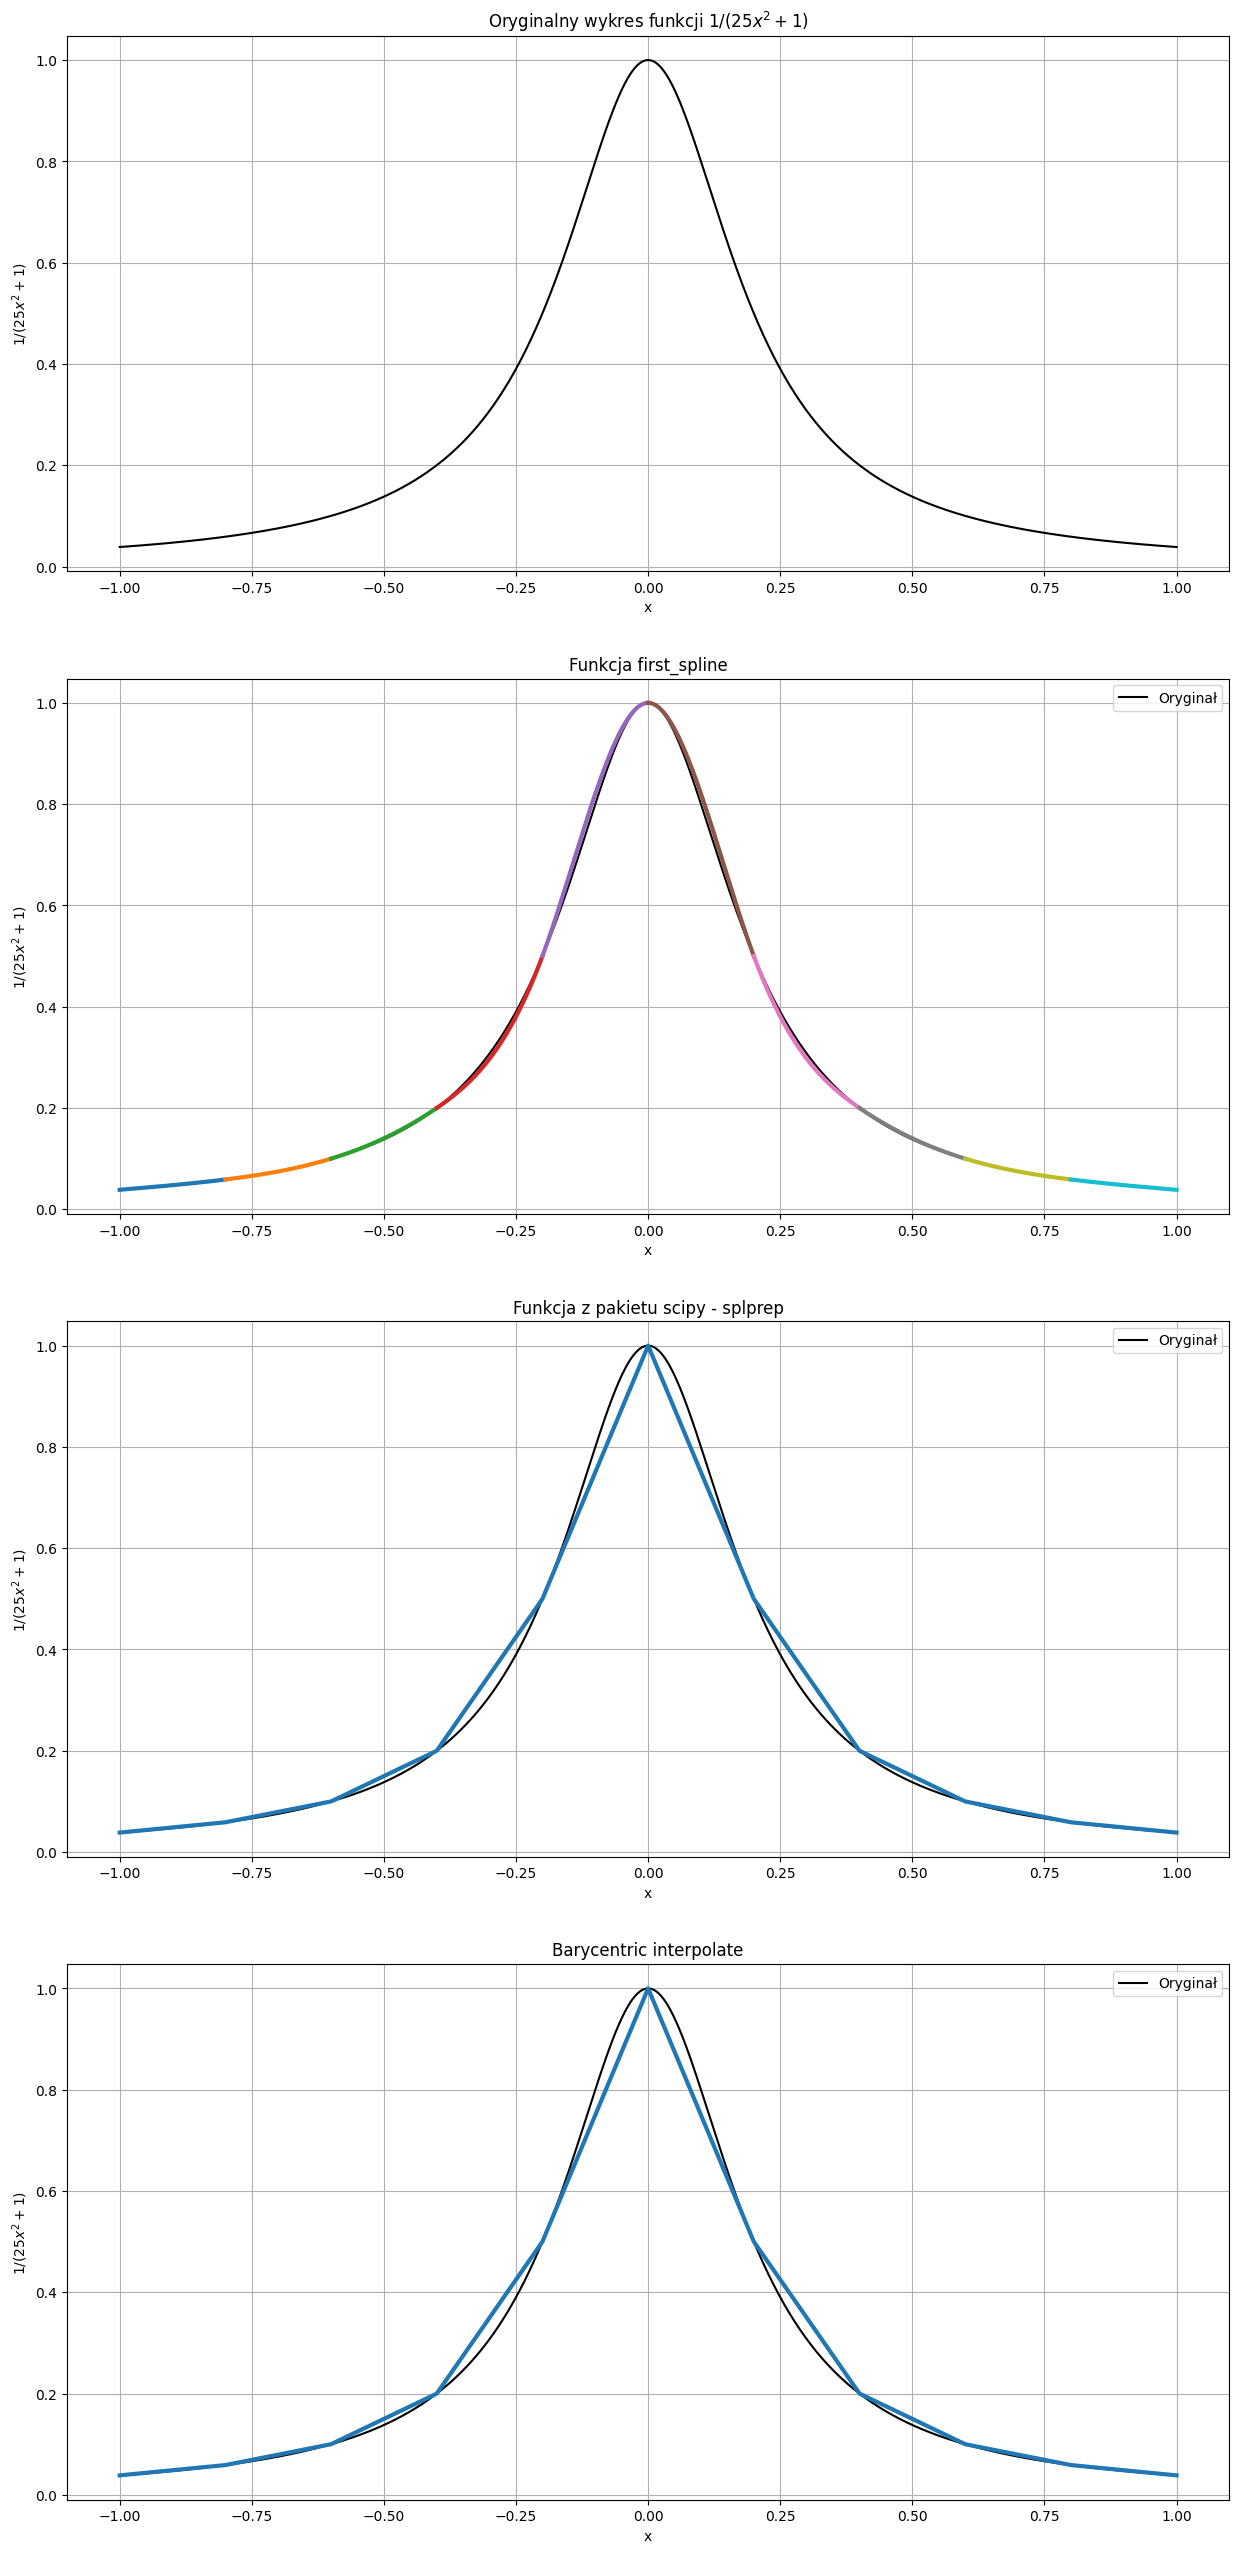

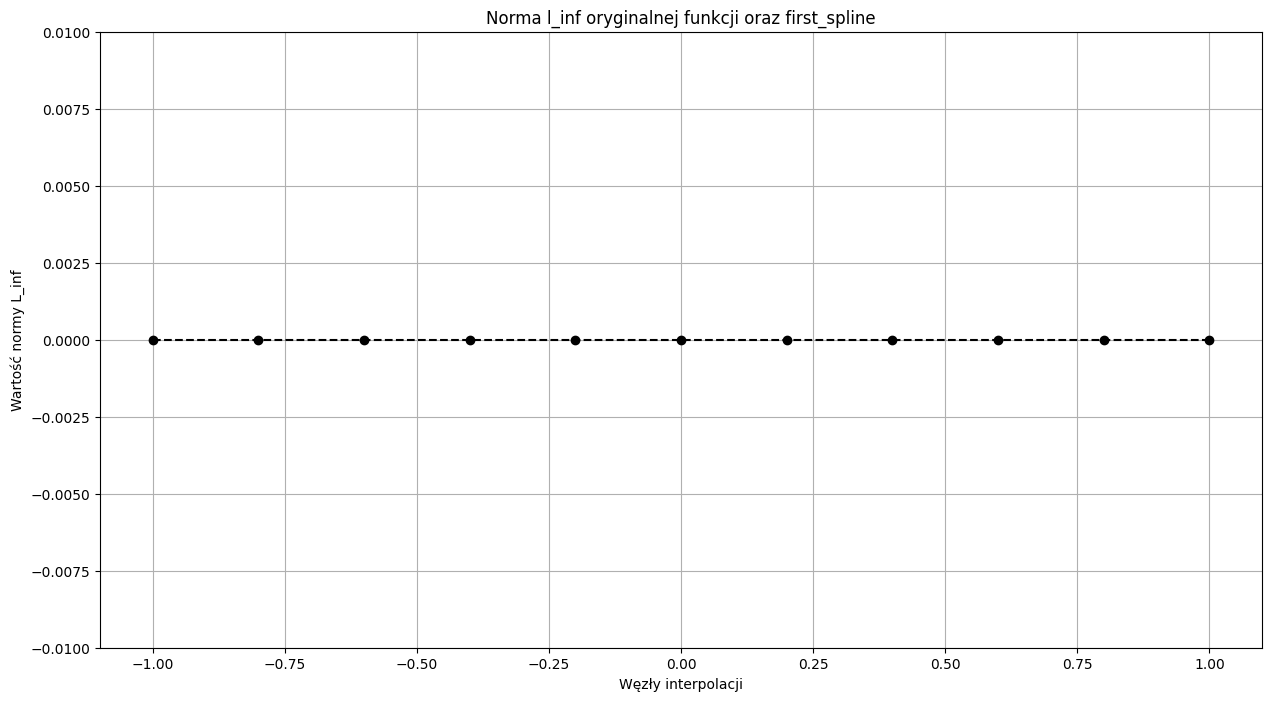

In [72]:
f = lambda x: 1/(25*x**2+1)

nodes = np.linspace(-1, 1, 11)

domain = np.linspace(-1, 1, 1000)

tck, u = scipy.interpolate.splprep([nodes, f(nodes)], s=0)
x, y = scipy.interpolate.splev(u, tck)

b2, c2, d2 = main.cubic_spline(nodes, f(nodes))
f2_cubic = [[b2[i],c2[i], d2[i]] for i in range(len(b2))]


yinp = scipy.interpolate.barycentric_interpolate(nodes, f(nodes), nodes)

plt.figure(figsize=(15, 32))

ax = plt.subplot(4, 1, 1)
ax.plot(domain, f(domain), 'k')
ax.set(xlabel='x', ylabel='$1/(25x^2+1)$')
plt.grid()
plt.title(label='Oryginalny wykres funkcji $1/(25x^2+1)$')

values = []
ax = plt.subplot(4, 1, 2)
ax.plot(domain, f(domain), 'k', label='Oryginał')
for i in range(len(nodes)-1):
    x_new = np.linspace(nodes[i], nodes[i+1], 1000)
    values.append((PolyCoefficients_cubical(x_new, f2_cubic[i], nodes[i], f(nodes[i])))[0])
    ax.plot(x_new, PolyCoefficients_cubical(x_new, f2_cubic[i], nodes[i], f(nodes[i])), linewidth=3)
x_new = np.linspace(nodes[-2], nodes[-1], 1000)
values.append((PolyCoefficients_cubical(x_new, f2_cubic[-1], nodes[-1], f(nodes[-1])))[-1])
ax.set(xlabel='x', ylabel='$1/(25x^2+1)$')
plt.grid()
plt.legend()
plt.title(label='Funkcja first_spline')

ax = plt.subplot(4, 1, 3)
ax.plot(domain, f(domain), 'k', label='Oryginał')
ax.plot(x, y, linewidth=3)
ax.set(xlabel='x', ylabel='$1/(25x^2+1)$')
plt.grid()
plt.legend()
plt.title(label='Funkcja z pakietu scipy - splprep')

ax = plt.subplot(4, 1, 4)
ax.plot(domain, f(domain), 'k', label='Oryginał')
ax.plot(nodes, yinp, linewidth=3)
ax.set(xlabel='x', ylabel='$1/(25x^2+1)$')
plt.title(label='Barycentric interpolate')
plt.grid()
plt.legend()
plt.show()

errors = []
for i in range(len(values)):
    errors.append(last_week_main.L_inf((f(nodes))[i], values[i]))

plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.plot(nodes, errors, 'ko--')
plt.ylim((-0.01, 0.01))
ax.set(xlabel='Węzły interpolacji', ylabel='Wartość normy L_inf')
plt.grid()
plt.title(label='Norma l_inf oryginalnej funkcji oraz first_spline')
plt.show()

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Jacobi Method Output:


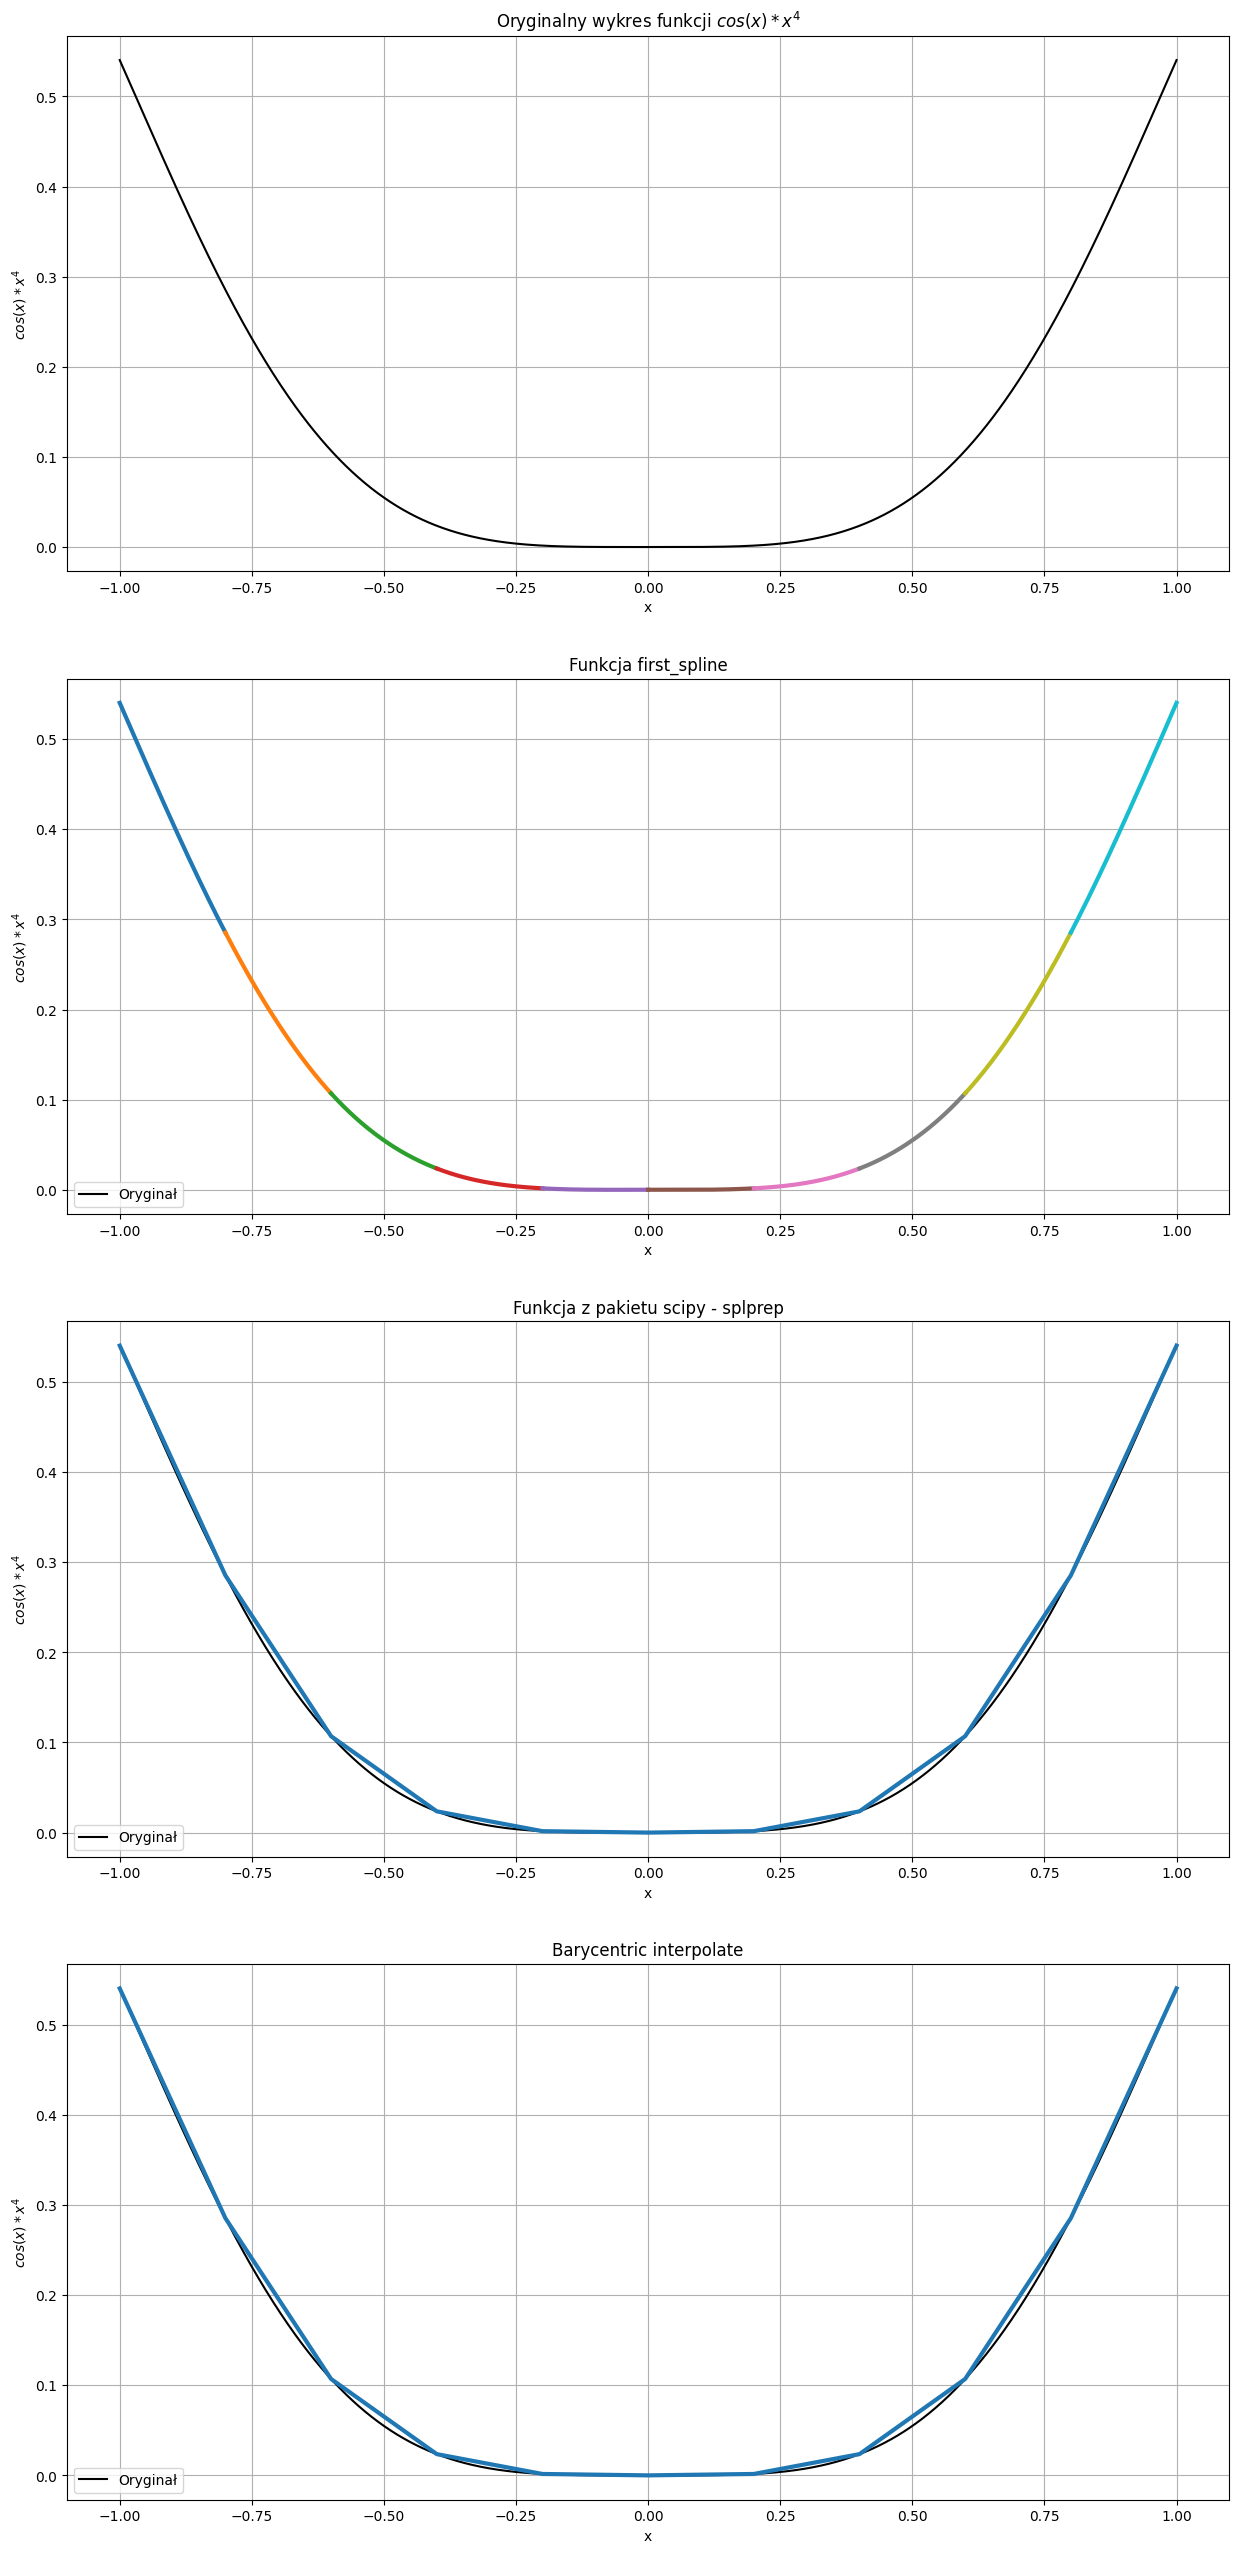

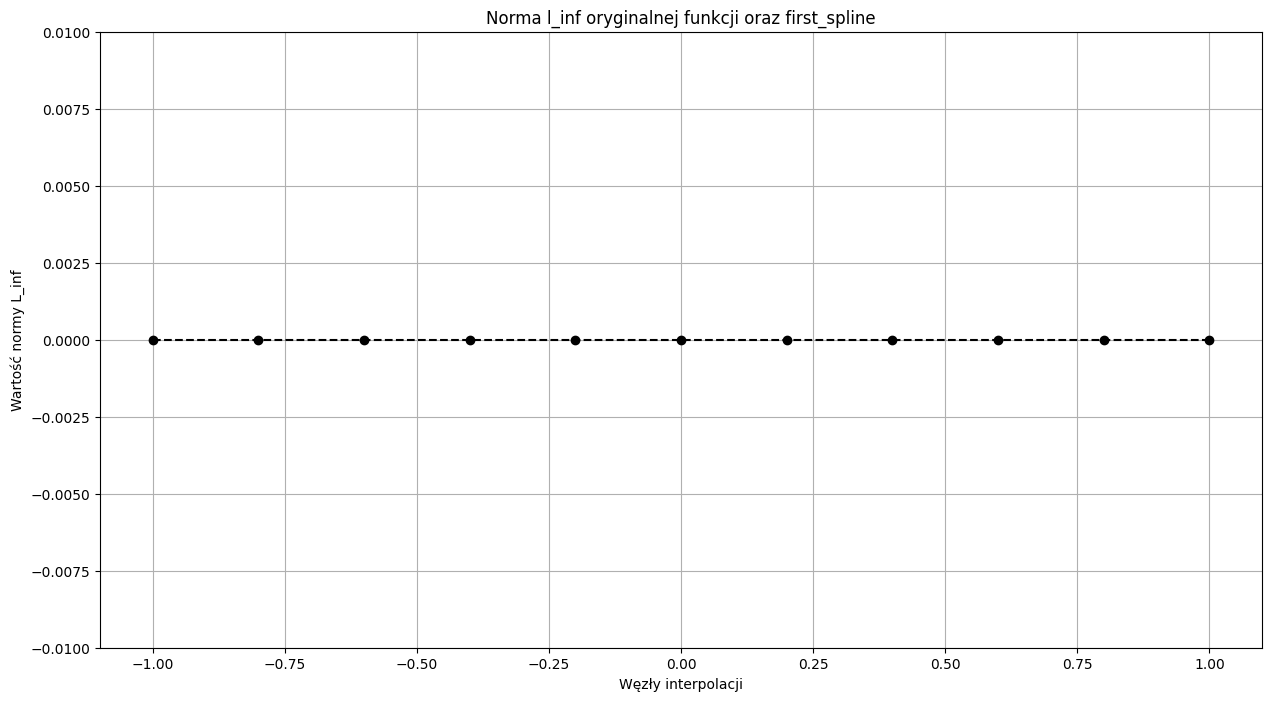

In [73]:
f = lambda x: np.cos(x)*x**4

nodes = np.linspace(-1, 1, 11)

domain = np.linspace(-1, 1, 1000)

tck, u = scipy.interpolate.splprep([nodes, f(nodes)], s=0)
x, y = scipy.interpolate.splev(u, tck)

b2, c2, d2 = main.cubic_spline(nodes, f(nodes))
f2_cubic = [[b2[i],c2[i], d2[i]] for i in range(len(b2))]


yinp = scipy.interpolate.barycentric_interpolate(nodes, f(nodes), nodes)

plt.figure(figsize=(15, 32))

ax = plt.subplot(4, 1, 1)
ax.plot(domain, f(domain), 'k')
ax.set(xlabel='x', ylabel='$cos(x)*x^4$')
plt.grid()
plt.title(label='Oryginalny wykres funkcji $cos(x)*x^4$')

values = []
ax = plt.subplot(4, 1, 2)
ax.plot(domain, f(domain), 'k', label='Oryginał')
for i in range(len(nodes)-1):
    x_new = np.linspace(nodes[i], nodes[i+1], 1000)
    values.append((PolyCoefficients_cubical(x_new, f2_cubic[i], nodes[i], f(nodes[i])))[0])
    ax.plot(x_new, PolyCoefficients_cubical(x_new, f2_cubic[i], nodes[i], f(nodes[i])), linewidth=3)
x_new = np.linspace(nodes[-2], nodes[-1], 1000)
values.append((PolyCoefficients_cubical(x_new, f2_cubic[-1], nodes[-1], f(nodes[-1])))[-1])
ax.set(xlabel='x', ylabel='$cos(x)*x^4$')
plt.grid()
plt.legend()
plt.title(label='Funkcja first_spline')

ax = plt.subplot(4, 1, 3)
ax.plot(domain, f(domain), 'k', label='Oryginał')
ax.plot(x, y, linewidth=3)
ax.set(xlabel='x', ylabel='$cos(x)*x^4$')
plt.grid()
plt.legend()
plt.title(label='Funkcja z pakietu scipy - splprep')

ax = plt.subplot(4, 1, 4)
ax.plot(domain, f(domain), 'k', label='Oryginał')
ax.plot(nodes, yinp, linewidth=3)
ax.set(xlabel='x', ylabel='$cos(x)*x^4$')
plt.title(label='Barycentric interpolate')
plt.grid()
plt.legend()
plt.show()

errors = []
for i in range(len(values)):
    errors.append(last_week_main.L_inf((f(nodes))[i], values[i]))

plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.plot(nodes, errors, 'ko--')
plt.ylim((-0.01, 0.01))
ax.set(xlabel='Węzły interpolacji', ylabel='Wartość normy L_inf')
plt.grid()
plt.title(label='Norma l_inf oryginalnej funkcji oraz first_spline')
plt.show()

Splajn kubiczny dla obu rozważanych funkcji interpoluje je wręcz idealnie generując przy tym błędy bardzo małego rzędu (mniejsze niż wartość zera maszynowego). Obserwując drugi wykres dla obu funkcji widać jak poprawnie wpasowuje się w krzywą oryginalnej funkcji bardzo dokładnie ją interpolując.

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

Jacobi Method Output:


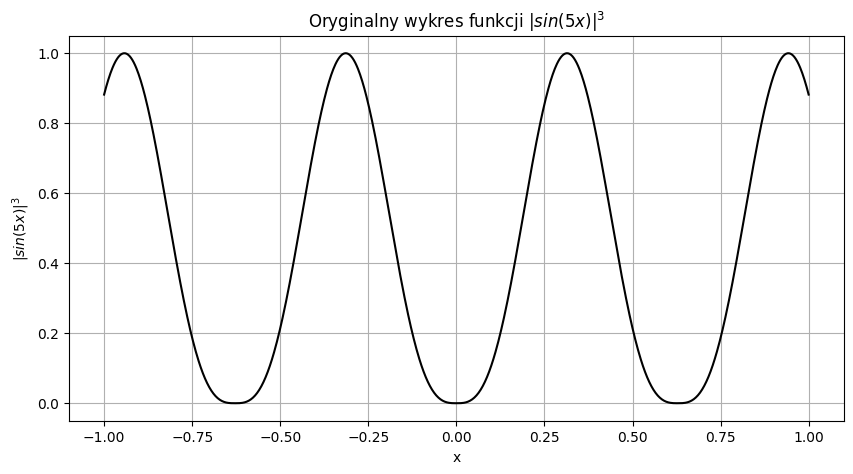

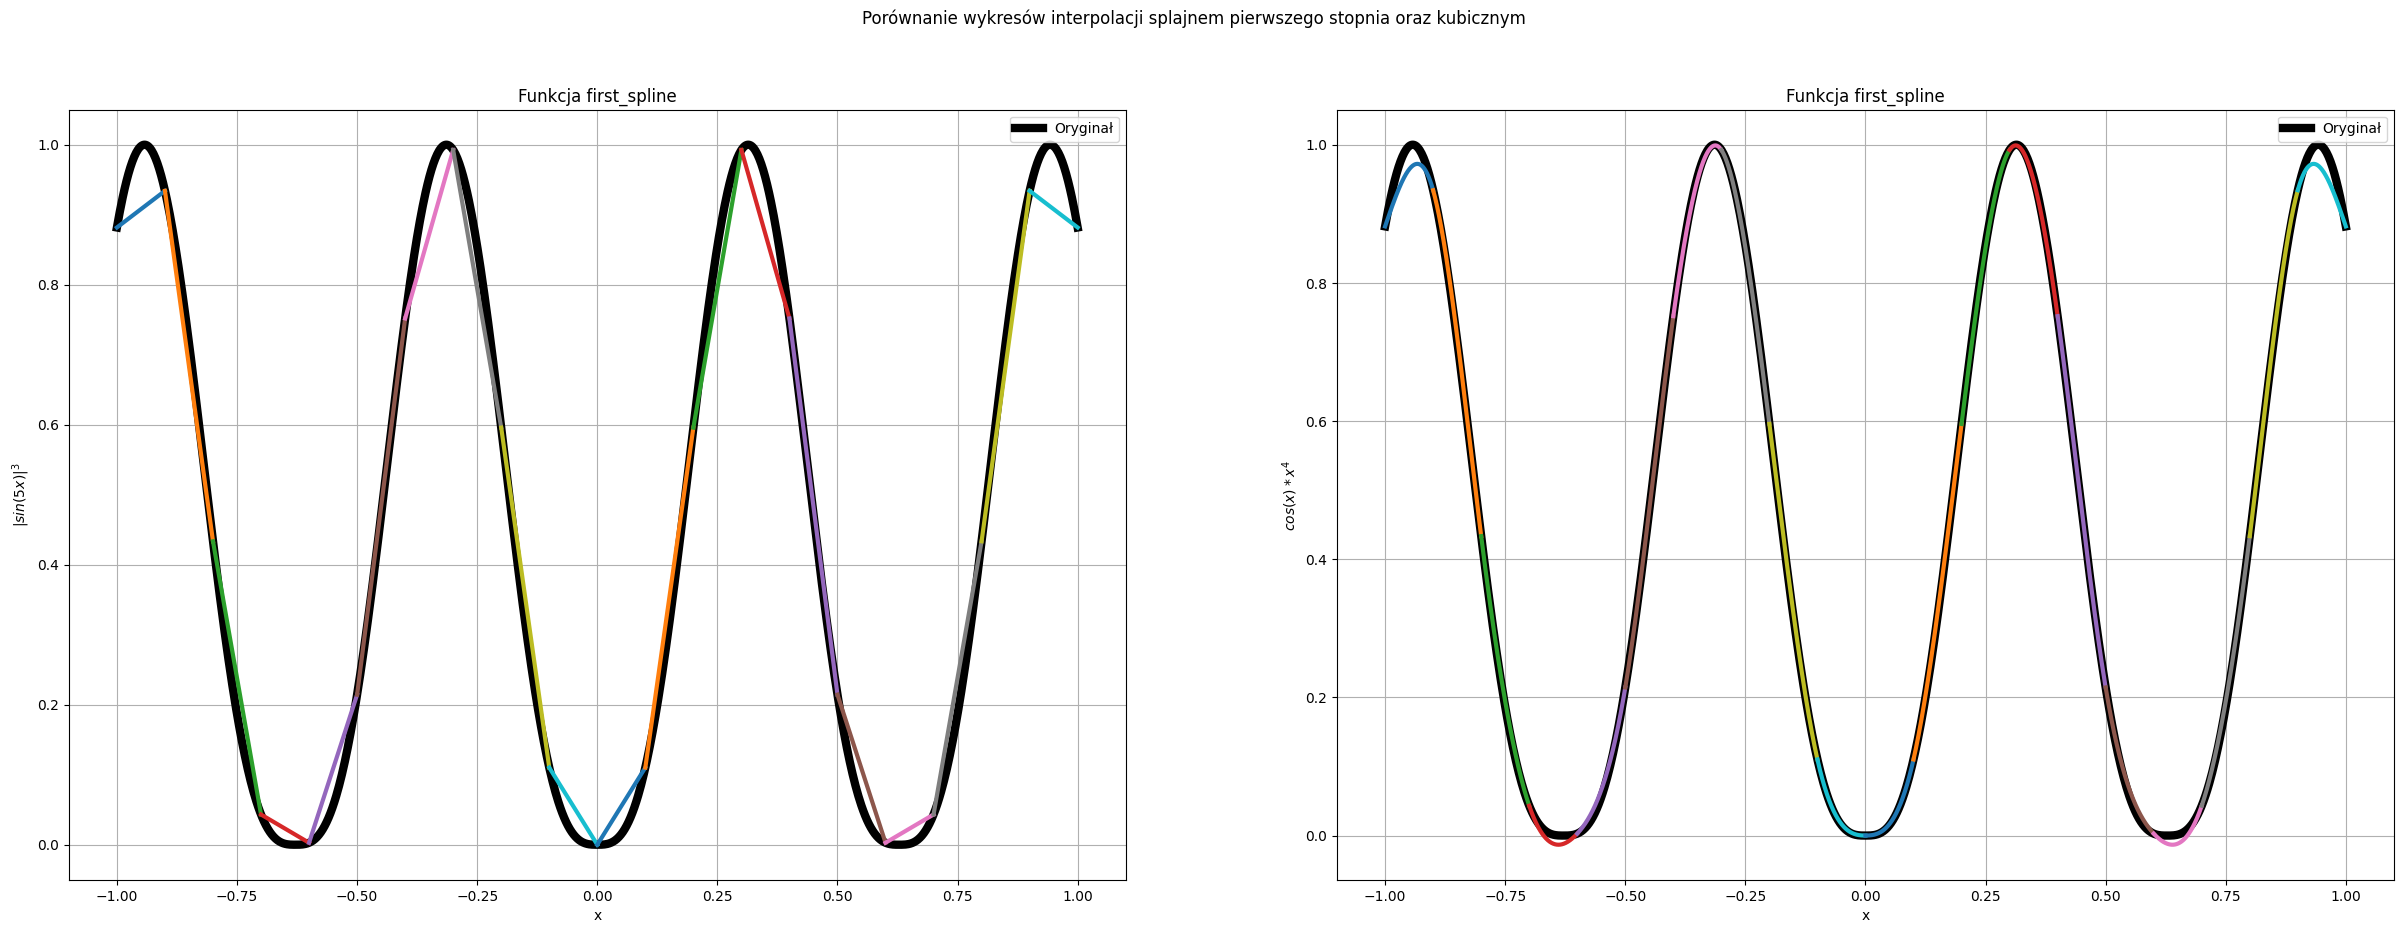

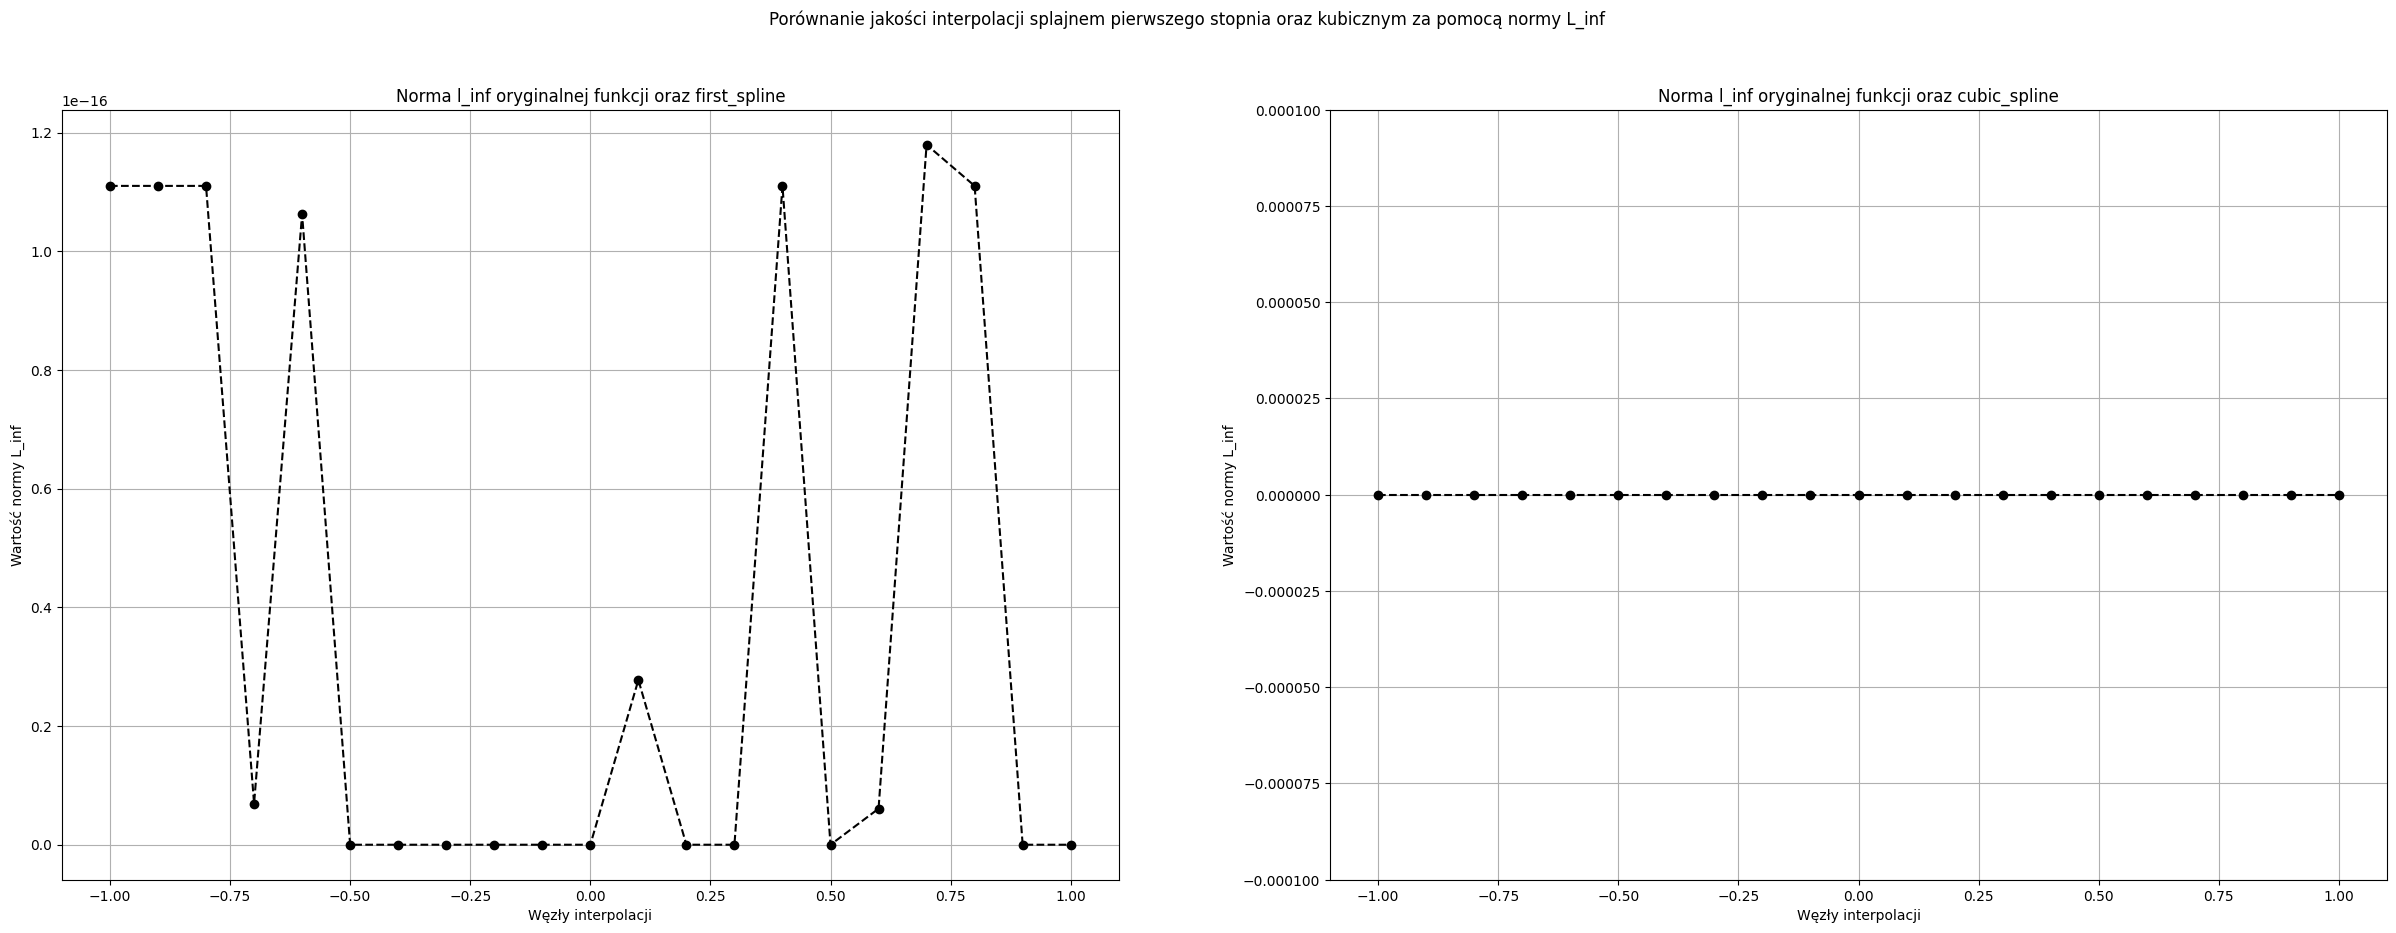

In [75]:
f = lambda x: np.abs(np.sin(5*x))**3

nodes = np.linspace(-1, 1, 21)

domain = np.linspace(-1, 1, 1000)

values1 = []
values4 = []
errors1 = []
errors4 = []

a1, b1 = main.first_spline(nodes, f(nodes))
f1 = [[b1[i],a1[i]] for i in range(len(a1))]

b4, c4, d4 = main.cubic_spline(nodes, f(nodes))
f4 = [[b4[i], c4[i], d4[i]] for i in range(len(b4))]

plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.plot(domain, f(domain), 'k')
ax.set(xlabel='x', ylabel='$|sin(5x)|^3$')
plt.grid()
plt.title(label='Oryginalny wykres funkcji $|sin(5x)|^3$')


plt.figure(figsize=(30, 10))

ax = plt.subplot(1, 2, 1)
ax.plot(domain, f(domain), 'k',linewidth=6, label='Oryginał')
for i in range(len(nodes)-1):
    x_new = np.linspace(nodes[i], nodes[i+1], 1000)
    values1.append((PolyCoefficients(x_new, f1[i]))[0])
    ax.plot(x_new, PolyCoefficients(x_new, f1[i]), linewidth=3)
x_new = np.linspace(nodes[-2], nodes[-1], 1000)
values1.append((PolyCoefficients(x_new, f1[-1]))[-1])
ax.set(xlabel='x', ylabel='$|sin(5x)|^3$')
plt.grid()
plt.legend()
plt.title(label='Funkcja first_spline')
plt.suptitle(t='Porównanie wykresów interpolacji splajnem pierwszego stopnia oraz kubicznym')

ax = plt.subplot(1, 2, 2)
ax.plot(domain, f(domain), 'k',linewidth=6, label='Oryginał')
for i in range(len(nodes)-1):
    x_new = np.linspace(nodes[i], nodes[i+1], 1000)
    values4.append((PolyCoefficients_cubical(x_new, f4[i], nodes[i], f(nodes[i])))[0])
    ax.plot(x_new, PolyCoefficients_cubical(x_new, f4[i], nodes[i], f(nodes[i])), linewidth=3)
x_new = np.linspace(nodes[-2], nodes[-1], 1000)
values4.append((PolyCoefficients_cubical(x_new, f4[-1], nodes[-1], f(nodes[-1])))[-1])
ax.set(xlabel='x', ylabel='$cos(x)*x^4$')
plt.grid()
plt.legend()
plt.title(label='Funkcja first_spline')
plt.show()

for i in range(len(values1)):
    errors1.append(last_week_main.L_inf((f(nodes))[i], values1[i]))

for i in range(len(values4)):
    errors4.append(last_week_main.L_inf((f(nodes))[i], values4[i]))


plt.figure(figsize=(30, 10))
ax = plt.subplot(1, 2, 1)
ax.plot(nodes, errors1, 'ko--')
ax.set(xlabel='Węzły interpolacji', ylabel='Wartość normy L_inf')
plt.grid()
plt.title(label='Norma l_inf oryginalnej funkcji oraz first_spline')
plt.suptitle(t='Porównanie jakości interpolacji splajnem pierwszego stopnia oraz kubicznym za pomocą normy L_inf')

ax = plt.subplot(1, 2, 2)
ax.plot(nodes, errors4, 'ko--')
ax.set(xlabel='Węzły interpolacji', ylabel='Wartość normy L_inf')
plt.ylim(-0.0001, 0.0001)
plt.grid()
plt.title(label='Norma l_inf oryginalnej funkcji oraz cubic_spline')
plt.show()


Porównując obie metody można zauważyć, że obie dają bardzo duża dokładność oraz jakość interpolacji. Splajn pierwszego stopnia generuje błędy na poziomie co najwyżej zera maszynowego natomiast splajn kubiczny nie generuje ich praktycznie w ogóle. Dodatkowo na wykresach widać jak krzywa wygenerowana dzięki splajnom ładnie nakrywa oryginalną krzywą co dowodzi dobrej jakości interpolacji.
Dwa ostatnie laboratoria rzetelnie zapoznały mnie ze sposobami interpolacji różnych funkcji oraz z ewentualnymi problemami/efektami, które można napotkać podczas przybliżania funkcji. Dodatkowo utrwaliłem umiejętności związane z wizualizacją danych na wykresach.